In [8]:
from keras.applications.inception_v3 import InceptionV3

from keras.preprocessing import image
import tensorflow as tf
from keras.layers import Input
from keras import backend as K
import keras
import skimage.transform

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
input_tensor = Input(shape=(299, 299, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

In [6]:
x = base_model.input
y = base_model.output

In [18]:
img = plt.imread('./to_dream.jpg')
img = img[:img.shape[1]]
print(img.shape)
# img = scipy.misc.imresize(img, (img.shape[0]//3,img.shape[0]//3,3)).astype(np.float32)/img.max()
img = skimage.transform.resize(img, (299,299,3)).astype(np.float32)
img /= img.max()
# img = img.astype(np.float32)/img.max()

(3036, 3036, 3)


/usr/local/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [19]:
tmp = img.copy()

(-0.5, 298.5, 298.5, -0.5)

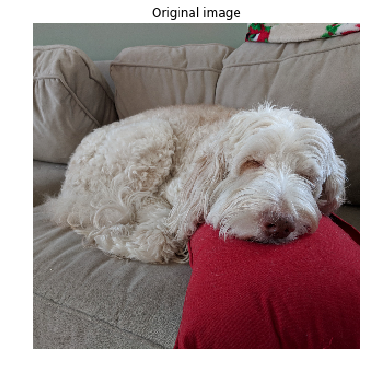

In [22]:
plt.figure(figsize=(6,6))
plt.title('Original image')
plt.imshow(img)
plt.axis('off')

In [26]:
grad_op = tf.gradients(y, x)

In [56]:
aa = base_model.layers[196].output
int_grad200 = tf.gradients(aa, x)
int_grad100 = tf.gradients(base_model.layers[100].output, x)

In [57]:
try:
    while True:
        tf.get_default_session().close()
except: pass
sess = K.get_session()
K.set_learning_phase(0)
oo = sess.graph.get_operation_by_name('batch_normalization_1/keras_learning_phase').outputs[0]

In [58]:
eps = 1e-3
tmp = img.copy()

In [ ]:
ints100 = []

for i in range(101):
    tmp += eps*sess.run(int_grad100, feed_dict={x:tmp[None], oo:False})[0][0]
    tmp -= tmp.min()
    tmp /= tmp.max()
    if i % 10 ==0 and i>0:
        print(i)
        ints100.append(tmp.copy())

In [58]:
eps = 1e-3
tmp = img.copy()

In [59]:
ints200 = []

for i in range(101):
    tmp += eps*sess.run(int_grad200, feed_dict={x:tmp[None], oo:False})[0][0]
    tmp -= tmp.min()
    tmp /= tmp.max()
    if i % 10 ==0 and i>0:
        print(i)
        ints200.append(tmp.copy())

10
20
30
40
50
60
70
80
90
100


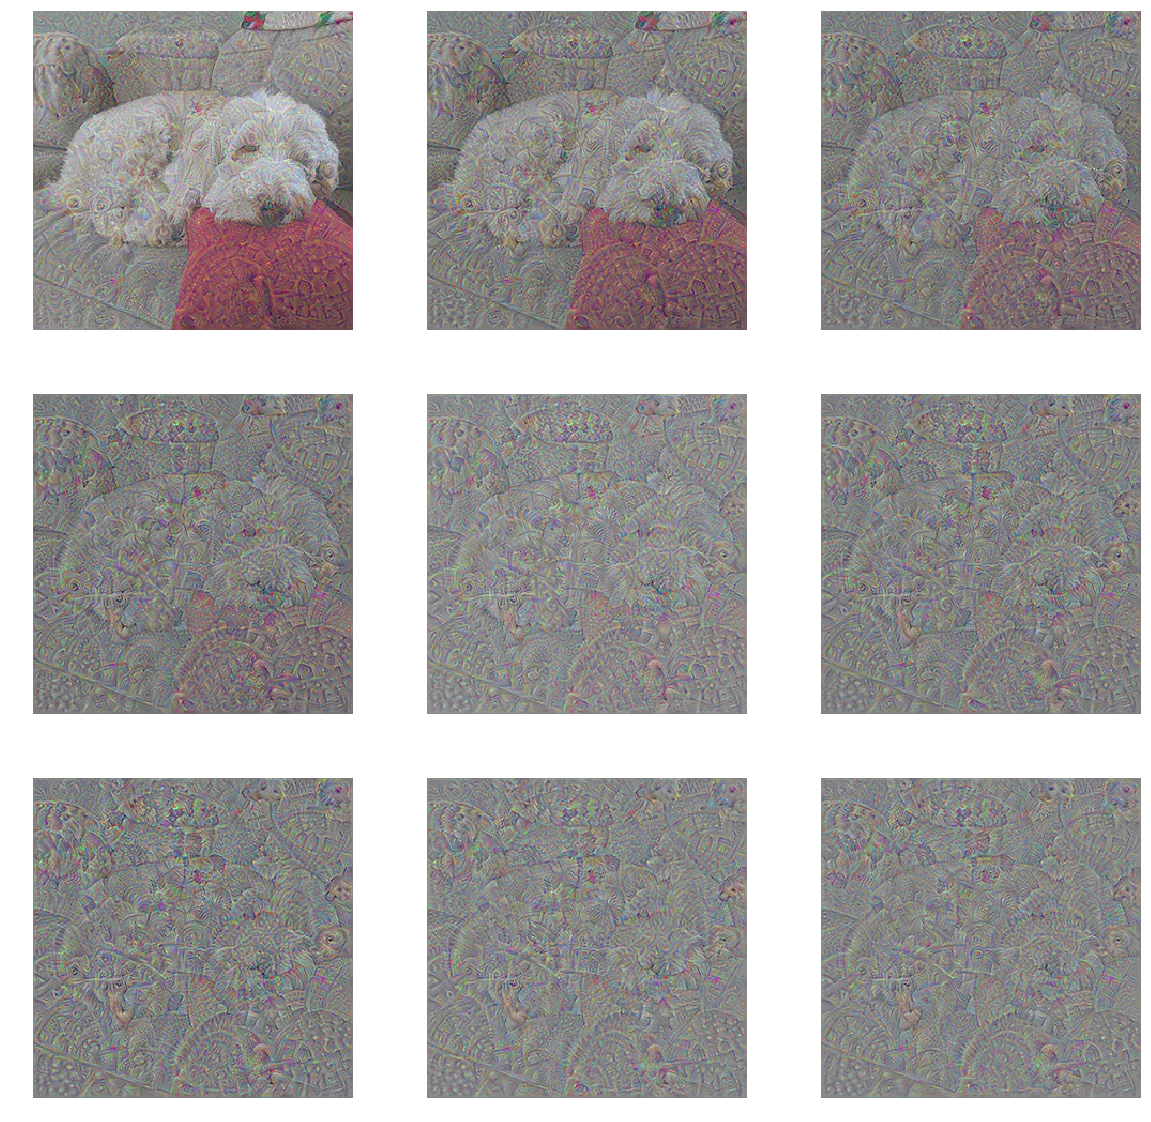

In [61]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(ints200[i])
    plt.axis('off')

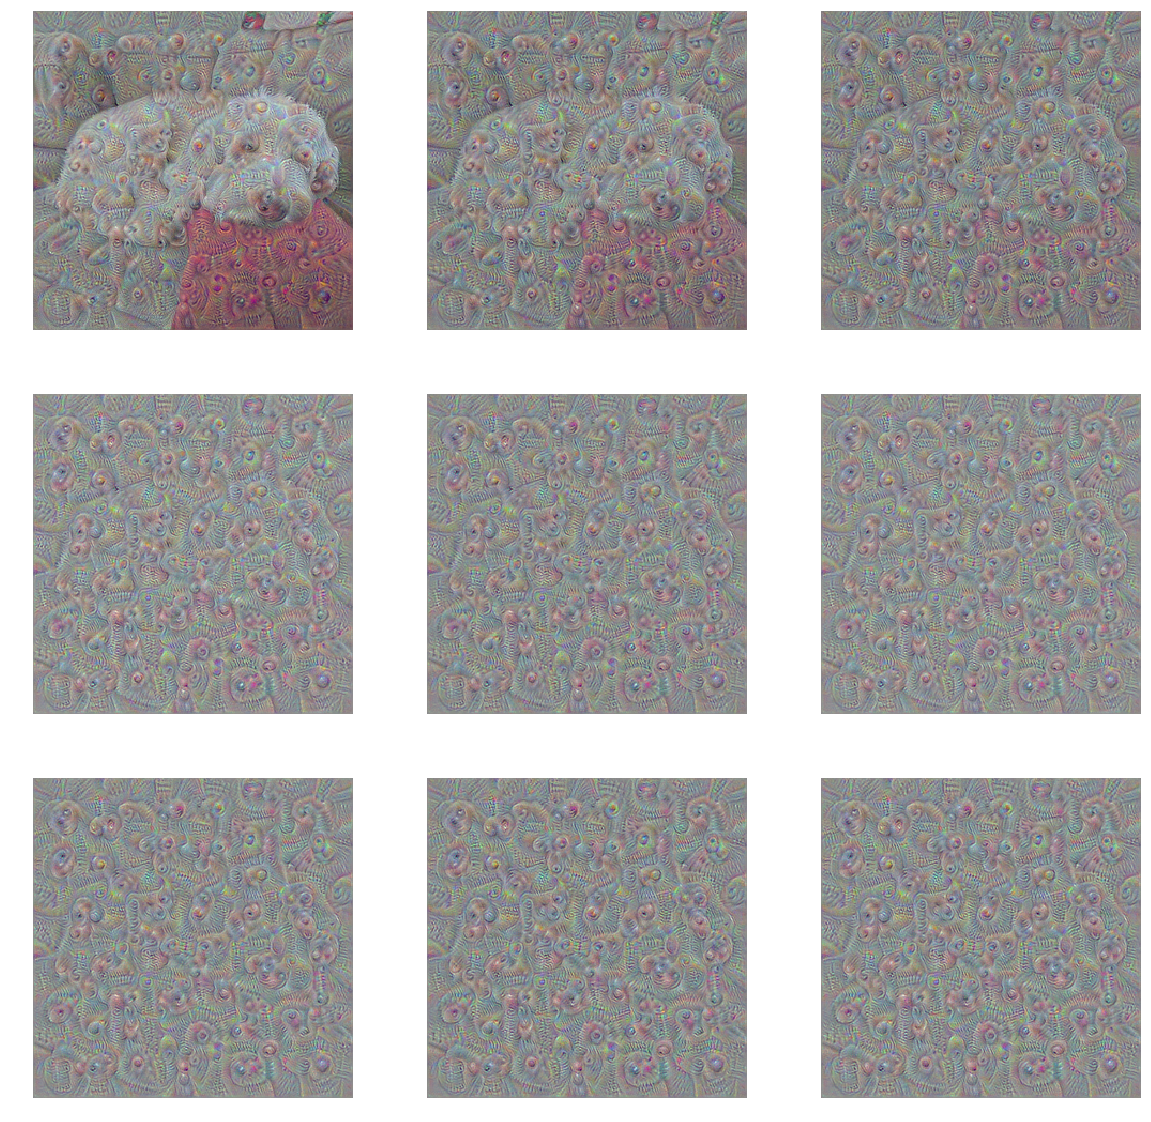

In [62]:
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(ints100[i])
    plt.axis('off')